<a href="https://colab.research.google.com/github/MuhammadIqbal233/Minggu2_PCVK/blob/main/Minggu7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


In [2]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image


In [23]:
from google.colab import files

# Mengunggah gambar
uploaded = files.upload()

Saving girl.jpg to girl (1).jpg


Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

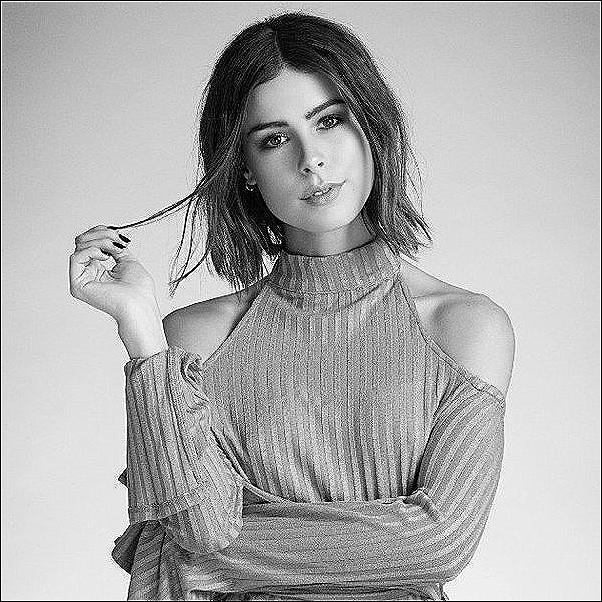

In [24]:
img_m = cv.imread('girl.jpg')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

#Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

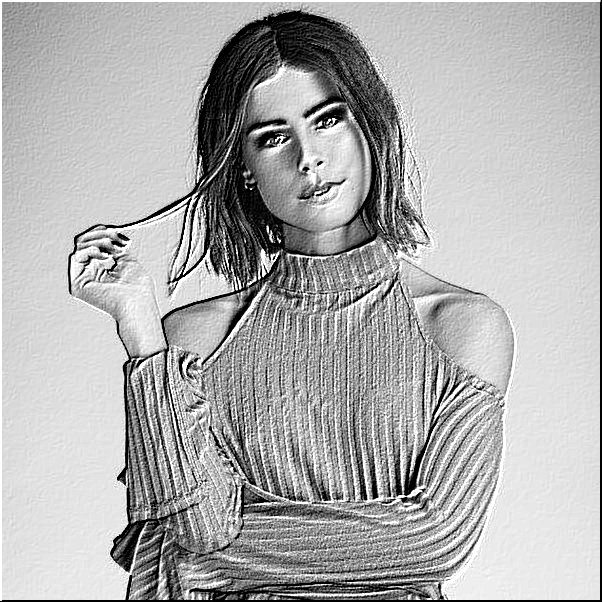

In [25]:
#Emboss
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

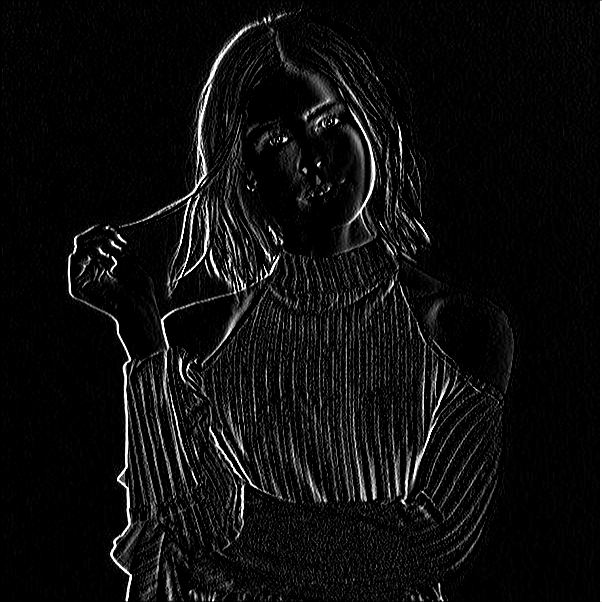

In [26]:

#Left Sobel Edge Detection
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

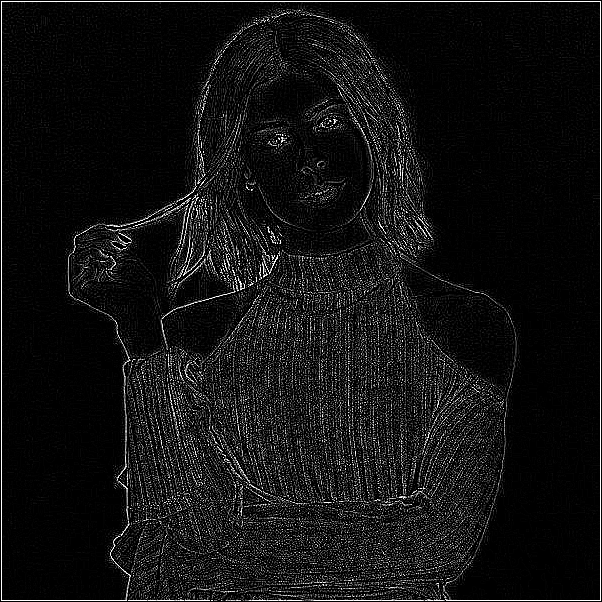

In [27]:
#Canny Edge Detection
kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

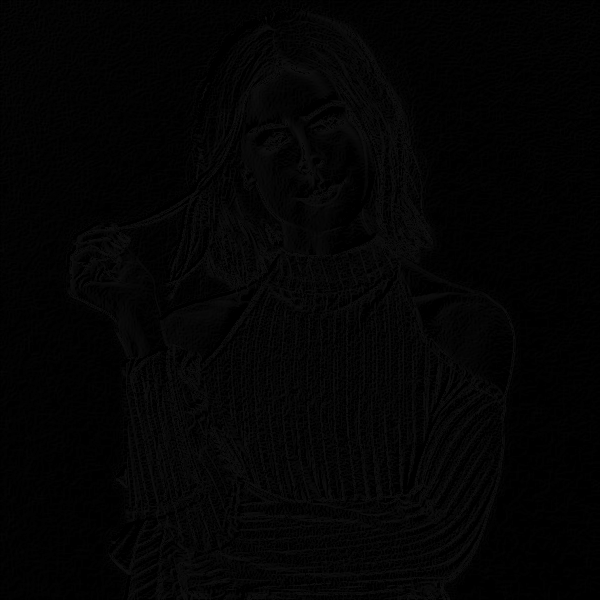

In [28]:
#Prewitt Edge Detection
kernel_prewitt_vertical = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

kernel_prewitt_horizontal = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

result_vertical = cv.filter2D(img_gray, -1, kernel_prewitt_vertical)
result_horizontal = cv.filter2D(img_gray, -1, kernel_prewitt_horizontal)
result_combined = np.sqrt(result_vertical*2 + result_horizontal*2).astype(np.uint8)

cv2_imshow(result_combined)

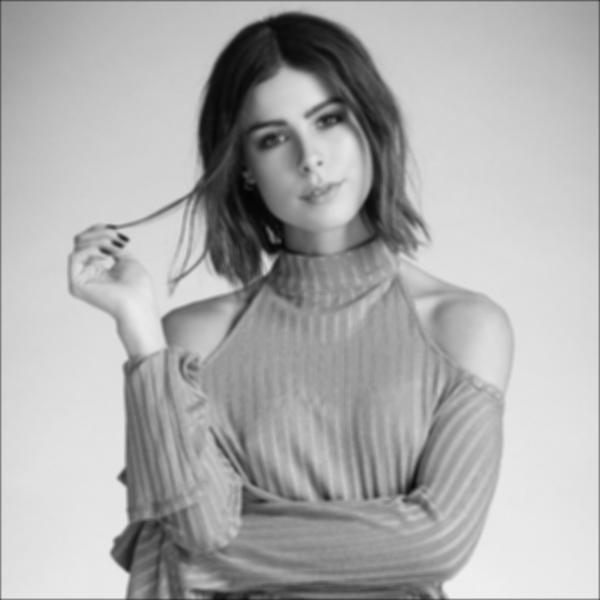

In [29]:
#5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

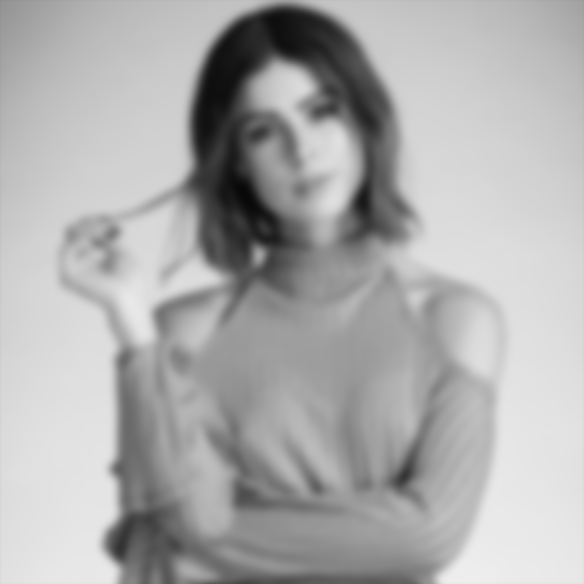

In [30]:
#21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))